<font color = green >


# Clustering 

</font>

Clustering is the task of grouping together similar objects.
<br>
Similarity is a metric that reflects the strength of relationship between two data objects (e.g. distance)

<font color = green >

## K-means

</font>

Algorithm: 
* Initialize $K$ cluster centroids*  
* Repeat till state is stabile: 
       1) assign every point to closest centroid 
       2) compute new centroids as means of samples assigned to corresponding centroid

\*   use multi computation with random initialization of centroids to avoid risk of local optima.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
%matplotlib notebook

![K-meams](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

<font color = green >

## Sample: Image compression with Kmeans

</font>

Each pixel is represented as the red, green and blue intensity values (RGB). This contains thousands of colors and the task is to reduce the number of colors. By making this reduction, it is possible to represent (compress) the photo in an efficient way. Specifically, store the RGB values of the 16 selected colors, and only store the index of the color for each pixel in the image. 

<font color = green >

### Load image

</font>

<IPython.core.display.Javascript object>


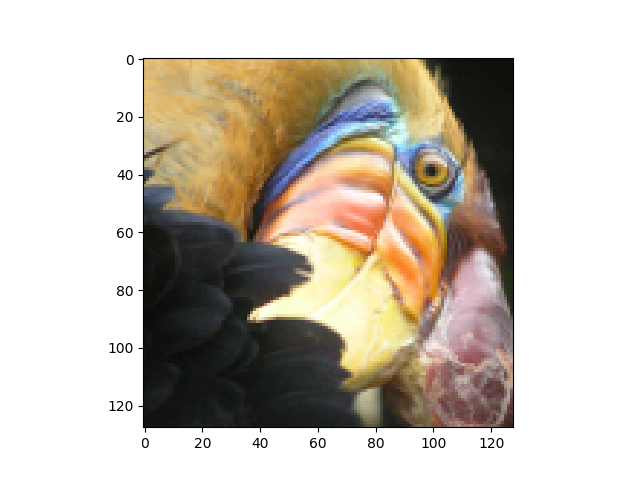

In [5]:
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data')

fn=  os.path.join(path , 'bird_small.png')
image = np.array(plt.imread(fn))
plt.figure()
plt.imshow(image)

<font color = green >

### Review image data

</font>

In [6]:
image.shape

(128, 128, 3)

<font color = green >

### Reshape image to flatten all pixels

</font>

In [7]:
print ('image.shape:',image.shape)
img_reshaped = image.reshape (-1, 3) # flatten all pixels 
print ('img_reshaped.shape:',img_reshaped.shape)

image.shape: (128, 128, 3)
img_reshaped.shape: (16384, 3)


<font color = green >

### Apply Kmeans

</font>

In [8]:
from sklearn.cluster import KMeans

In [9]:
clf= KMeans(n_clusters=16).fit(img_reshaped)
print ('Cenroids:')
centroids = clf.cluster_centers_  

Cenroids:


<font color = green >

### Assign the one of $K$ color to every pixel 

</font>

In [10]:
predicted_colors = clf.predict(img_reshaped) # closest centroid for every pixel 
print  (predicted_colors.shape)
predicted_colors

(16384,)


array([13, 13, 13, ...,  8,  8,  8], dtype=int32)

<font color = green >

### Visualize the compressed image 

</font>

Essentially centroids and predicted_colors are values necessary to store compressed image  


In [11]:
img_recovered= centroids[predicted_colors] # assign to every pixel the values of closest centroid
print ('img_recovered.shape:', img_recovered.shape)
img_recovered # note values are the same for pixels assigned to the same centroid

img_recovered.shape: (16384, 3)


array([[0.8466456 , 0.70508176, 0.45084363],
       [0.8466456 , 0.70508176, 0.45084363],
       [0.8466456 , 0.70508176, 0.45084363],
       ...,
       [0.16687763, 0.16771197, 0.15972699],
       [0.16687763, 0.16771197, 0.15972699],
       [0.16687763, 0.16771197, 0.15972699]], dtype=float32)

<IPython.core.display.Javascript object>


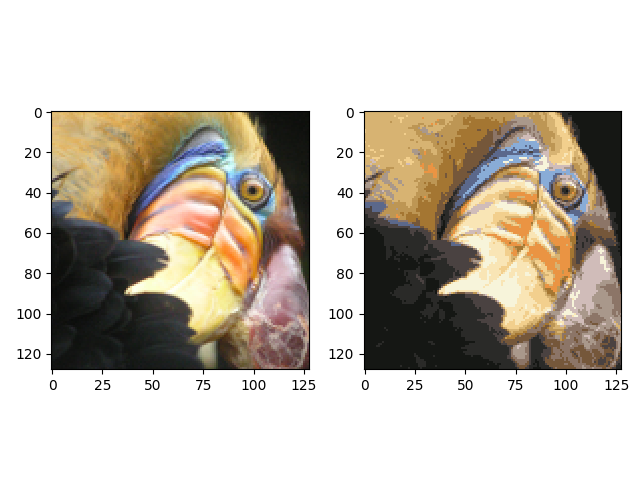

In [12]:
img_recovered_3d = img_recovered.reshape(image.shape[0], image.shape[1], 3)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(img_recovered_3d)
plt.tight_layout()

<font color = green >

## Sample: Titanic classification with Kmeans

</font>

In [174]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns

<font color = green >

### Load data 

</font>

In [175]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train_df = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test_df = pd.read_csv(test_url)

In [176]:
train = train_df.copy()
test = test_df.copy()

In [177]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<font color = green >

### Review missed values 

</font>

In [178]:
def print_missing_srtatistic(): 
    print("train")
    print(train.isnull().sum())
    print("\n")
    print("test")
    print(test.isnull().sum())
print_missing_srtatistic()

train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<font color = green >

### Handle missing values 

</font>
There are following approaches:

- Remove rows with missing values
- <font color = blue>Impute missing values  </font>

In this case lets keep the records since they may contain relevant information
<br>
There are following approaches to <strong>impute missing values </strong>:

- constant value that e.g. 0 (different from all other values)
- corresponding value of randomly selected record
- <font color = blue>mean of all corresponding available values  </font>
- value estimated by another machine learning model

In [179]:
# train.fillna(0, inplace=True)
# test.fillna(0, inplace=True)

train.fillna(train.mean(), inplace=True) # Note this fills separate value for every column
test.fillna(test.mean(), inplace=True)

print_missing_srtatistic() # not filled the ones that are not numerical (mean is not available)
# Leave as they are -  will drop those features as irrelevant 

train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [180]:
# train.fillna(0, inplace=True)
# test.fillna(0, inplace=True)

# print_missing_srtatistic() 

<font color = green >

### Review features  (optional)

</font>


In [181]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [182]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [183]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

<IPython.core.display.Javascript object>


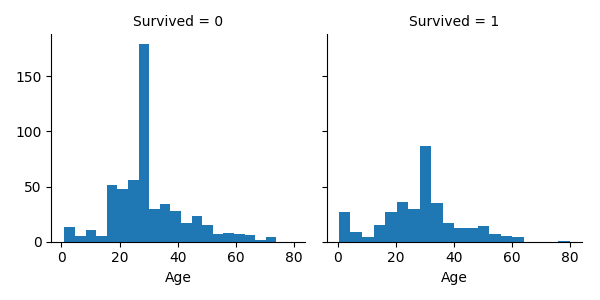

In [184]:
# age has too mane values so use the histogram  
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<font color = green >

### Drop irrelevant features 

</font>

In [185]:
# for demo 
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

<font color = green >

### Convert the features to numerical 

</font>

In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


<font color = green >

#### Convert Remaining non-numerical features 

</font>

In [187]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [189]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


<font color = green >

### Separate lablels

</font>

In [190]:
X_train = np.array(train.drop(['Survived'], 1))#.astype(float))
y_train = np.array(train['Survived'])
X_test = np.array(test) # .astype(float)

<font color = green >

### Scale features 

</font>

In [191]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<font color = green >

### Train  model 

</font>

In [192]:
kmeans = KMeans(n_clusters=2) # Survived or Not survived
kmeans.fit(X_train_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<font color = green >

### Evaluate model 

</font>

In [193]:
def compute_train_accuracy():
    y_train_predicted = kmeans.predict(X_train_scaled)
    train_accuracy = np.mean(y_train_predicted== y_train)    
    return train_accuracy

for random_state in range (10):
    kmeans = KMeans(n_clusters=2, random_state=random_state)  # 0 vs 2 
    kmeans.fit(X_train_scaled)    
    print (compute_train_accuracy() )


0.7867564534231201
0.7867564534231201
0.2132435465768799
0.2132435465768799
0.7867564534231201
0.7867564534231201
0.7867564534231201
0.2132435465768799
0.7867564534231201
0.7867564534231201


<font color = green >

### Match clusters to labels

</font>

Consider the majority of correct prediction of train set 

In [194]:
# Clusters indices may appear opposite to prediction labels 
def predict_corrected(X_to_predict):    
    if compute_train_accuracy() > .5:
        return kmeans.predict(X_to_predict)
    else: 
        return 1- kmeans.predict(X_to_predict)


for random_state in range (8):
    kmeans = KMeans(n_clusters=2, max_iter=500, random_state=random_state)  # 0 vs 2 
    kmeans.fit(X_train_scaled)

    y_train_predicted_corrected = predict_corrected(X_train_scaled)
    accuracy_corrected = np.mean(y_train == y_train_predicted_corrected)
    print ('{} ->  {}'.format (compute_train_accuracy(), accuracy_corrected))



0.7867564534231201 ->  0.7867564534231201
0.7867564534231201 ->  0.7867564534231201
0.2132435465768799 ->  0.7867564534231201
0.2132435465768799 ->  0.7867564534231201
0.7867564534231201 ->  0.7867564534231201
0.7867564534231201 ->  0.7867564534231201
0.7867564534231201 ->  0.7867564534231201
0.2132435465768799 ->  0.7867564534231201


<font color = green >

### Predict  test set 

</font>

In [195]:
kmeans.predict(X_test_scaled)

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [196]:
predict_corrected(X_test_scaled)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [197]:
df_res= test.copy()
df_res['Survived'] = pd.Series (predict_corrected(X_test_scaled))
df_res = df_res[['PassengerId', 'Survived']]
df_res.head(20)


PassengerId  Survived
0           892         0
1           893         1
2           894         0
3           895         0
4           896         1
5           897         0
6           898         1
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1
15          907         1
16          908         0
17          909         0
18          910         1
19          911         1

In [198]:
import os
cwd= os.getcwd() 
path = os.path.join(cwd,'data') 
fn = os.path.join(path, 'titanic_submission_kmeans.csv') 
df_res.to_csv(fn, index=False)

# Score = 0.76555

<font color = green >

## Home Task: Implement K-means algorithm

</font>


<font color = green >

###  Data 

</font>



<IPython.core.display.Javascript object>


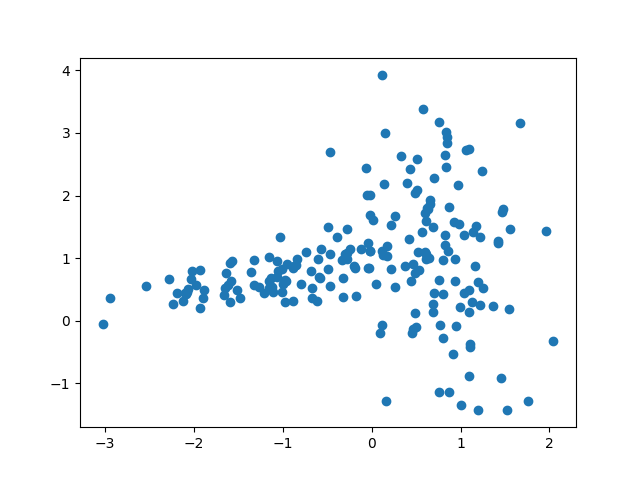

In [63]:
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

<font color = green >

###  Steps of implementatiion

</font>

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

<font color = green >

## Learn more
</font>

[K-means clustering: how it works](https://www.youtube.com/watch?v=_aWzGGNrcic)

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


[K-Means Clustering in Python with scikit-learn](https://www.datacamp.com/community/tutorials/k-means-clustering-python)